In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/My\ Drive/USPollenKeras/USPollen/

/content/gdrive/My Drive/USPollenKeras/USPollen


In [ ]:
!sudo apt-get install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (551 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconf

In [ ]:
!find . -name "*.txt" -print0 | xargs -0 dos2unix

In [25]:
import glob
import numpy as np
import os
classes = []
test = []
with open("/content/gdrive/My Drive/USPollen/classes.txt","r") as f:
  for line in f.readlines():
    key = line.strip()
    test.append(key)
    glober = glob.glob("*"+key+"*.jpg")
    classes.append(np.array(glober))

In [26]:
for i in test:
  print(i+"  "+repr(test.count(i)))



  

Carya ovata  2
Ulmus americana  1
Fraxinus americana  1
Cupressus arizonica  1
Salix lasiolepsis  1
Fagus grandifolia  1
Betula nigra  1
Betula occidentalis  1
Salix nigra  1
Aceracea Acer negundo  2
Juniperus virginiana  1
Juniperus scopulorum  2
Asteracea Xanthium strumarium  1
Rumex crispus  1
Plantango lanceolata  1
Asteracea Ambrosia trifida  1
Soldiago sp.  1
Alnus incana  1
Ulmaceae celtis occidentalis  1
Juglandacea Carya alba  1
Chenopodium album  1
Aceracea Acer negundo  2
Juniperus asheii  1
Artemesia vulgaris  1
Urtica dioica  1
Quercus agrifolia  1
Quercus nigra  1
Olea europeae  1
Poaceae Dactylis glomerata  1
Melaleuca quinquenervia  1
Casuarina equisetifolia  1
Pinacea Pinus strobus  2
Saliceae Populus sp.  1
Ambrosia psilostachya  1
Alnus rubra  1
Moracea Morus rubra  1
Juniperus scopulorum  2
Asteracea Ambrosia tridentata  1
Asteracea Artemesia pycnocephala  1
Carya ovata  2
Juglandacea Carya laciniosa  1
Platanacea Platanus sp.  1
platanus racemosa  1
Salsola kali  1

In [ ]:
import os
for i,val in enumerate(classes[20]):
  os.rename(classes[20][i],classes[20][i].replace("Lamb's","Lambs"))





In [ ]:
#Label Creation Runner creates txt file for each .jpg file for yolo labeling
count = -1
for i in classes:
  count+=1
  for j in i:
      label = j
      mylab = label.replace('.jpg','.txt')
      f = open(mylab,"w+")
      f.write(repr(count)+" 0.5 0.5 0.99 0.99\n")
      f.close()

In [ ]:
import cv2
width = 256
height = 256 # keep original height
dim = (width, height)
#resized_image = cv2.resize(image, (256, 256))
for i in classes:
  for j in i:
    img = cv2.imread(j, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(j, resized)
    print(j+" "+repr(img.shape))

In [ ]:
#train test split text
traintestsplitval = .9
trainfile = "train.txt"
f2 = open(trainfile,"w+")
testfile = "test.txt"
f = open(testfile,"w+")
for i in classes:
  for j,val in enumerate(i):
    label = val
    #larger train test split val = larger train lower test 
    if j>len(i)*traintestsplitval:
      f.write("img/USPollen/"+label+"\n")
    else:
      f2.write("img/USPollen/"+label+"\n")
f.close()
f2.close()

In [ ]:
count = -1
countArr = []
for i in classes:
  count+=1
  for j in i:
      print(count)
      countArr.append(count)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27


Text(0.5, 1.0, 'Histogram of amount of each type of pollen - 46 types')

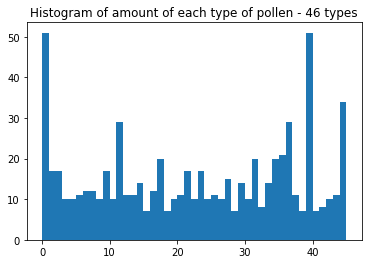

In [ ]:
import matplotlib.pyplot as plt
plt.hist(countArr,bins=range(46))
plt.title("Histogram of amount of each type of pollen - 46 types")

In [ ]:
%cd /content
%mkdir pollen 
!ls
%cd /content/gdrive/My\ Drive/PollenTest/pollen

/content
gdrive	pollen	sample_data
/content/gdrive/My Drive/PollenTest/pollen


In [ ]:
%cd /content/gdrive/My\ Drive/PollenTest/pollen


/content/gdrive/My Drive/PollenTest/pollen


Save detected images and theyre bounding boxes to a file

In [ ]:
import cv2
for i,val in enumerate(classes):
  for j,val2 in enumerate(val):
    numROI = 0
    with open(classes[i][j].replace(".jpg",".txt"),"r") as f:
      for line in f.readlines():
        key = line.strip()
        coords = key.split()
        img = cv2.imread(classes[i][j]+"")
        height, width, channels = img.shape
        x = (float(coords[1])*(width))
        y = (float(coords[2])*(height))
        w = (float(coords[3])*width)
        h = (float(coords[4])*height)
        left = int(x-w/2)
        right = int(x+w/2)
        top = int(y-h/2)
        bot = int(y+h/2)
        crop_img = img[top:bot,left:right]
        cv2.imwrite('/content/pollen/'+repr(numROI)+'+'+classes[i][j], crop_img)
        numROI+=1


In [ ]:
!cp -r /content/pollen /content/gdrive/My\ Drive/USPollen/

In [ ]:
!cp -r /content/gdrive/My\ Drive/PollenTest/pollen /content/pollen

^C


##Rotating Images with OpenCV

In [ ]:
import matplotlib.pyplot as plt
import cv2

for i,val in enumerate(classes):
  for j,val2 in enumerate(val):
    img = cv2.imread(classes[i][j])

    rows,cols,channels = img.shape

    cv2.imwrite('/content/pollen/'+classes[i][j], img)

    #90 degree rotation of original image
    M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    dst = cv2.warpAffine(img,M,(cols,rows))

    cv2.imwrite('/content/pollen/'+ '90+'+classes[i][j], dst)

    #180 degree rotation

    M2 = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
    dst2 = cv2.warpAffine(img,M2,(cols,rows))

    cv2.imwrite('/content/pollen/'+ '180+'+classes[i][j], dst2)

    #270 degree rotation
    M3 = cv2.getRotationMatrix2D((cols/2,rows/2),270,1)
    dst3 = cv2.warpAffine(img,M3,(cols,rows))

    cv2.imwrite('/content/pollen/'+ '270+'+classes[i][j], dst3)
    print("saving"+classes[i][j])







In [ ]:
!ls

'0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg'
'180+0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg'
'270+0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg'
'90+0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg'
'alt0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg'
'alt90+0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg'


##Image Smoothing

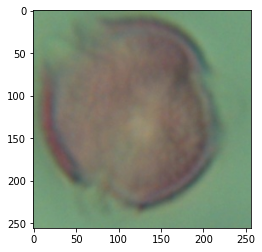

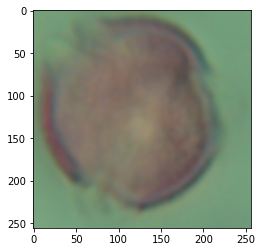

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread(classes[8][0])
b,g,r = cv2.split(img)           # get b, g, r
img = cv2.merge([r,g,b]) 

plt.imshow(img)
plt.show()
rows,cols,channels = img.shape

#blurring image
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

#Gaussian Filtering
blur = cv2.GaussianBlur(img,(5,5),0)

#Median Filtering
median = cv2.medianBlur(img,5)

plt.imshow(median)
plt.show()


##Morphological Transformations


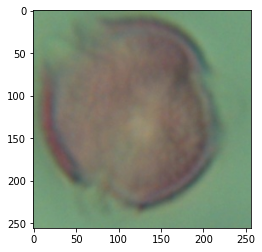

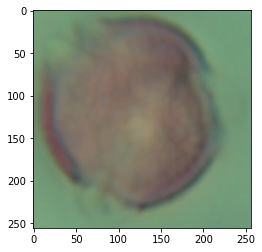

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread(classes[8][0])
b,g,r = cv2.split(img)           # get b, g, r
img = cv2.merge([r,g,b]) 

plt.imshow(img)
plt.show()
rows,cols,channels = img.shape

#dilation
dilation = cv2.dilate(img,kernel,iterations = 1)

#opening
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

#closing

plt.imshow(opening)
plt.show()

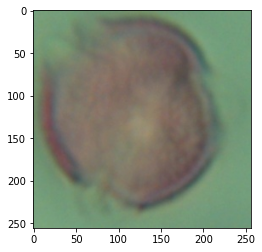

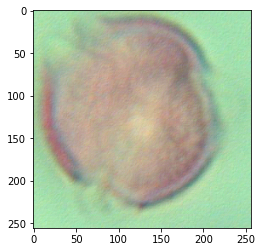

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread(classes[8][0])
b,g,r = cv2.split(img)           # get b, g, r
img = cv2.merge([r,g,b]) 

plt.imshow(img)
plt.show()
rows,cols,channels = img.shape

imgBright = increase_brightness(img,15)

kernel = np.array([[-1,-1,0], [-1,5,-1], [1.3,-1,0]])
img2 = cv2.filter2D(imgBright, -1, kernel)

plt.imshow(img2)
plt.show()

##Increase/Decrease Brightness

In [ ]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def decrease_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = value
    v[v < lim] = value
    v[v <= lim] -= value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


In [ ]:
import cv2
width = 256
height = 256 # keep original height
dim = (width, height)
img = cv2.imread(classes[8][0], cv2.IMREAD_UNCHANGED)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite(classes[8][0], resized)
print(classes[8][0]+" "+repr(img.shape))

0+400x Black willow (Salix nigra)Photo on 7-19-17 at 10.52 AM #2.jpg (1024, 1024, 3)


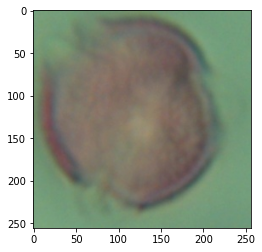

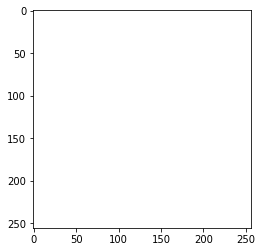

In [ ]:
# External libraries used for
# Image IO
from PIL import Image

# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk

# Data handling
import numpy as np

# Connected component filtering
import cv2

black = 0
white = 255
threshold = 40

img = cv2.imread(classes[8][0])
b,g,r = cv2.split(img)           # get b, g, r
img = cv2.merge([r,g,b]) 

plt.imshow(img)
plt.show()

# Open input image in grayscale mode and get its pixels.
img = Image.open(classes[8][0]).convert("LA")
pixels = np.array(img)[:,:,0]

# Remove pixels above threshold
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black


# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))


# Create and save new image.
newImg = Image.fromarray(pixels).convert('RGB')

# Find the connected components (black objects in your image)
# Because the function searches for white connected components on a black background, we need to invert the image
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)

# For every connected component in your image, you can obtain the number of pixels from the stats variable in the last
# column. We remove the first entry from sizes, because this is the entry of the background connected component
sizes = stats[1:,-1]
nb_components -= 1

# Define the minimum size (number of pixels) a component should consist of
minimum_size = 100

# Create a new image
newPixels = np.ones(pixels.shape)*255

# Iterate over all components in the image, only keep the components larger than minimum size
for i in range(1, nb_components):
    if sizes[i] > minimum_size:
        newPixels[output == i+1] = 0

# Create and save new image.
newImg = Image.fromarray(newPixels).convert('RGB')
opencvImage = cv2.cvtColor(np.array(newImg), cv2.COLOR_RGB2BGR)

plt.imshow(opencvImage)
plt.show()



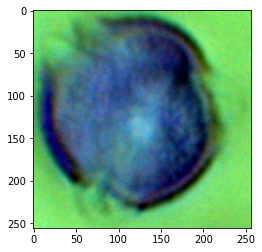

In [ ]:
from PIL import Image,ImageFilter  
#Read image
im = Image.open(classes[8][0])

   
from PIL import ImageEnhance  
enh = ImageEnhance.Contrast(im)  
enhnew = enh.enhance(3)
opencvImage = cv2.cvtColor(np.array(enhnew), cv2.COLOR_RGB2BGR)

plt.imshow(opencvImage)
plt.show()

